In [1]:
import numpy as np
import pandas as pd
import lasio as ls
import matplotlib.pyplot as plt

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lasio


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
las = ls.read(r'C:\dataset\00-05-10-078-12W4-0.LAS')
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [6]:
las.sections['Well']

[HeaderItem(mnemonic="WELL", unit="", value="HB THORNBURY", descr="Well_name   "),
 HeaderItem(mnemonic="LOC", unit="", value="00/05-10-078-12W4/0", descr="Locati"),
 HeaderItem(mnemonic="UWI", unit="", value="00/05-10-078-12W4/0", descr="Uwi   "),
 HeaderItem(mnemonic="ENTR", unit="", value="JHS", descr="Entered      - ENTERE"),
 HeaderItem(mnemonic="SRVC", unit="", value="SCHLUMBERGER", descr="Scn         "),
 HeaderItem(mnemonic="STRT", unit="M", value="256.032", descr="top_depth    - S"),
 HeaderItem(mnemonic="STOP", unit="M", value="478.282", descr="bot_depth    - S"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.25", descr="increment    - STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL Value")]

In [7]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Well_name    - WELL (WELL): 		 HB THORNBURY
Location     - LOCATION (LOC): 		 00/05-10-078-12W4/0
Uwi          - UNIQUE WELL ID (UWI): 		 00/05-10-078-12W4/0
Entered      - ENTERED BY (ENTR): 		 JHS
Scn          - SERVICE COMPANY (SRVC): 		 SCHLUMBERGER
top_depth    - START DEPTH (STRT): 		 256.032
bot_depth    - STOP DEPTH (STOP): 		 478.282
increment    - STEP LENGTH (STEP): 		 0.25
NULL Value (NULL): 		 -999.25


In [8]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
RHOB
GR
DPHI
NPHI
ILD


In [9]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: M, 	 Description: DEPTH        - DEPTH
Curve: RHOB, 	 Units: KG/M3, 	 Description: DENS         - BULK DENSITY
Curve: GR, 	 Units: API, 	 Description: GR           - GAMMA RAY
Curve: DPHI, 	 Units: V/V, 	 Description: PHID         - DENSITY POROSITY (SANDSTONE)
Curve: NPHI, 	 Units: V/V, 	 Description: PHIN         - NEUTRON POROSITY (SANDSTONE)
Curve: ILD, 	 Units: OHMM, 	 Description: RESD         - DEEP RESISTIVITY (DIL)
There are a total of: 6 curves present within this file


In [10]:
well = las.df()

In [11]:
well.head()

,RHOB,GR,DPHI,NPHI,ILD
DEPT,,,,,
256.032,0.0,114.152,0.287,0.611,2.911
256.282,0.0,110.180,0.279,0.615,2.857
256.532,0.0,107.394,0.271,0.599,2.858
256.782,0.0,110.976,0.255,0.569,2.912
257.032,0.0,113.473,0.254,0.555,3.043


In [12]:
well.describe()

,RHOB,GR,DPHI,NPHI,ILD
count,890.000000,890.000000,890.000000,890.000000,890.000000
mean,614.369809,90.635317,0.267388,0.454631,11.388725
std,1027.506202,22.736230,0.072101,0.061942,6.964107
min,-104.348000,13.296000,0.000000,0.140000,2.078000
25%,0.000000,72.901250,0.226000,0.423250,5.957250
50%,0.000000,92.078500,0.269000,0.458500,10.383500
75%,2214.217500,108.300000,0.330000,0.486000,15.472500
max,2576.670000,148.500000,0.423000,0.624000,40.370000


In [13]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 256.032 to 478.282
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    890 non-null    float64
 1   GR      890 non-null    float64
 2   DPHI    890 non-null    float64
 3   NPHI    890 non-null    float64
 4   ILD     890 non-null    float64
dtypes: float64(5)
memory usage: 41.7 KB


<Axes: xlabel='DEPT'>

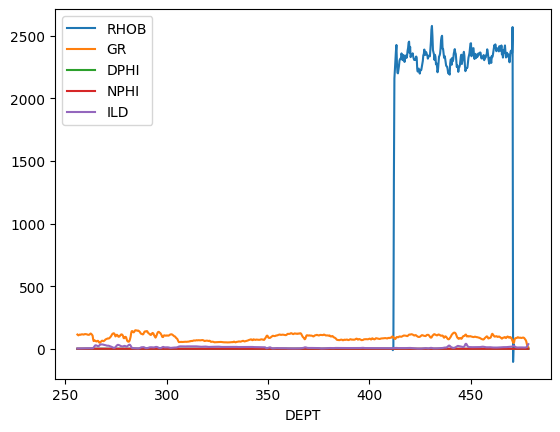

In [14]:
well.plot()

In [15]:
well.shape

(890, 5)

In [16]:
well.columns

Index(['RHOB', 'GR', 'DPHI', 'NPHI', 'ILD'], dtype='object')

<Axes: xlabel='DEPT'>

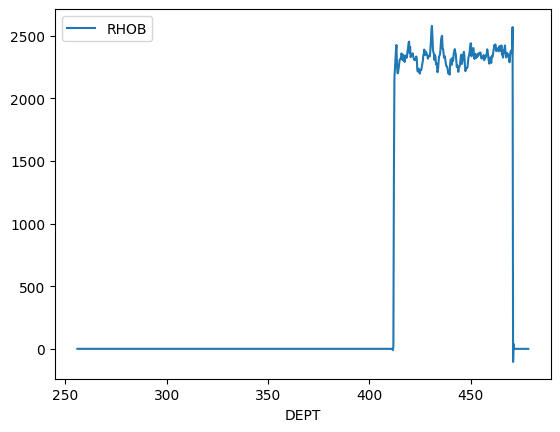

In [17]:
well.plot(y='RHOB')

In [18]:
if (well == -999.25).any().any():
    print("There are columns with -999.25 as null values.")
else:
    print("No columns have -999.25 as null values.")

No columns have -999.25 as null values.


In [19]:
well.reset_index(inplace=True)
well


,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,256.032,0.0,114.152,0.287,0.611,2.911
1,256.282,0.0,110.180,0.279,0.615,2.857
2,256.532,0.0,107.394,0.271,0.599,2.858
3,256.782,0.0,110.976,0.255,0.569,2.912
4,257.032,0.0,113.473,0.254,0.555,3.043
...,...,...,...,...,...,...
885,477.282,-0.0,59.317,0.053,0.313,12.277
886,477.532,-0.0,40.328,0.030,0.237,15.738
887,477.782,-0.0,25.939,0.007,0.172,22.794
888,478.032,0.0,17.333,0.000,0.140,31.613


In [20]:
well

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,256.032,0.0,114.152,0.287,0.611,2.911
1,256.282,0.0,110.180,0.279,0.615,2.857
2,256.532,0.0,107.394,0.271,0.599,2.858
3,256.782,0.0,110.976,0.255,0.569,2.912
4,257.032,0.0,113.473,0.254,0.555,3.043
...,...,...,...,...,...,...
885,477.282,-0.0,59.317,0.053,0.313,12.277
886,477.532,-0.0,40.328,0.030,0.237,15.738
887,477.782,-0.0,25.939,0.007,0.172,22.794
888,478.032,0.0,17.333,0.000,0.140,31.613


In [21]:
min_values = well.min()
min_values

DEPT    256.032
RHOB   -104.348
GR       13.296
DPHI      0.000
NPHI      0.140
ILD       2.078
dtype: float64

In [22]:
max_values = well.max()
max_values

DEPT     478.282
RHOB    2576.670
GR       148.500
DPHI       0.423
NPHI       0.624
ILD       40.370
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\1210472174.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


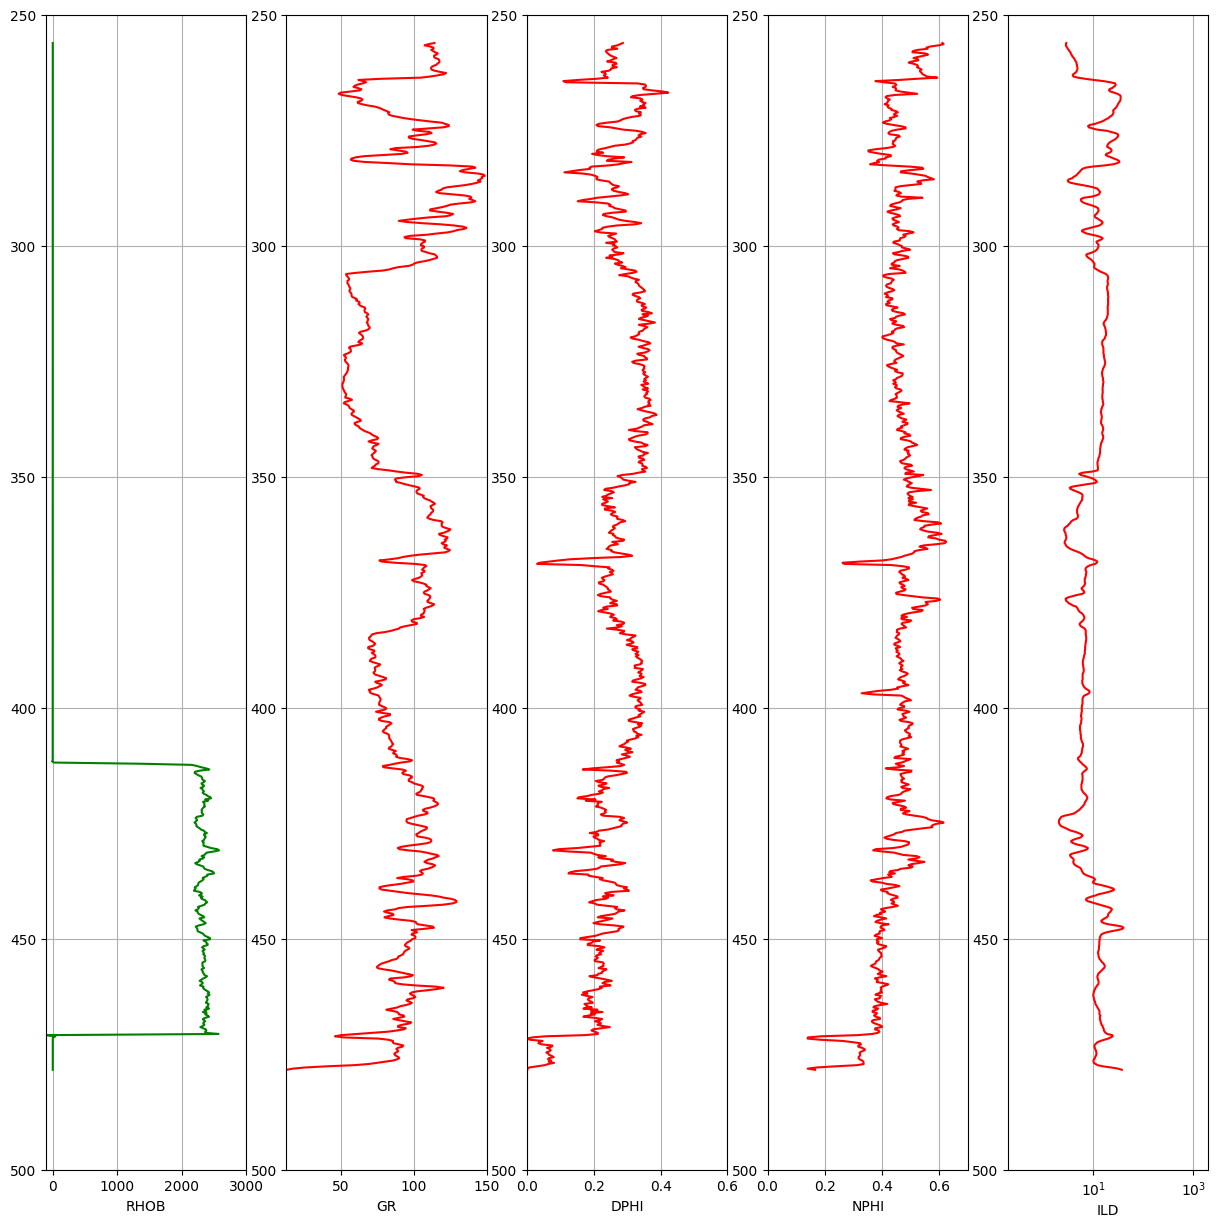

In [23]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = well, color = "green")
ax1.set_xlim(-105, 3000) 

ax2.plot("GR", "DEPT", data = well, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = well, color = "red")
ax3.set_xlim(0, 0.6)

ax4.plot("NPHI", "DEPT", data = well, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = well, color = "red")
ax5.set_xlim(0.2, 2000)
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,250) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [24]:
well

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,256.032,0.0,114.152,0.287,0.611,2.911
1,256.282,0.0,110.180,0.279,0.615,2.857
2,256.532,0.0,107.394,0.271,0.599,2.858
3,256.782,0.0,110.976,0.255,0.569,2.912
4,257.032,0.0,113.473,0.254,0.555,3.043
...,...,...,...,...,...,...
885,477.282,-0.0,59.317,0.053,0.313,12.277
886,477.532,-0.0,40.328,0.030,0.237,15.738
887,477.782,-0.0,25.939,0.007,0.172,22.794
888,478.032,0.0,17.333,0.000,0.140,31.613


In [25]:
!pip install scikit-learn


In [26]:
pip install tensorflow --user


Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
X = well[['GR', 'NPHI', 'ILD']].values
y = well['DPHI'].values


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build a simple neural network for regression
model = keras.Sequential([
    layers.Input(shape=(3,)),           # 3 input features (Neutron, Photoelectric, Resistivity)
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)                    # 1 output neuron for Density
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

# Train the model on the first well log data
model.fit(X, y, epochs=70, batch_size=32)


Epoch 1/70
28/28 [==============================] - 1s 2ms/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 2/70
28/28 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 3/70
28/28 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4/70
28/28 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 6/70
28/28 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 7/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 8/70
28/28 [==============================] - 0s 2ms/step - loss: 9.7753e-04 - mean_squared_error: 9.7753e-04
Epoch 9/70
28/28 [==============================] - 0s 2ms/step - loss: 9.3664e-04 - mean_squared_error: 9.3664e-04
Epoch 10/70


In [31]:
predictions = model.predict(X)
predictions

28/28 [==============================] - 0s 1ms/step


array([[ 0.24846946],
       [ 0.2430599 ],
       [ 0.24266838],
       [ 0.24002044],
       [ 0.24259777],
       [ 0.24156494],
       [ 0.24379806],
       [ 0.23223189],
       [ 0.22764295],
       [ 0.23971806],
       [ 0.24108796],
       [ 0.23919587],
       [ 0.24598332],
       [ 0.23311283],
       [ 0.23839961],
       [ 0.23483245],
       [ 0.2370698 ],
       [ 0.23293673],
       [ 0.23627734],
       [ 0.23585655],
       [ 0.2386005 ],
       [ 0.24144575],
       [ 0.23693635],
       [ 0.23806193],
       [ 0.23557232],
       [ 0.22753496],
       [ 0.22062069],
       [ 0.22646387],
       [ 0.23930587],
       [ 0.23739982],
       [ 0.2367315 ],
       [ 0.27890766],
       [ 0.23086728],
       [ 0.19233224],
       [ 0.22758552],
       [ 0.33000574],
       [ 0.34147787],
       [ 0.333708  ],
       [ 0.31094825],
       [ 0.32555825],
       [ 0.34102312],
       [ 0.34955332],
       [ 0.37488598],
       [ 0.39328054],
       [ 0.38459265],
       [ 0

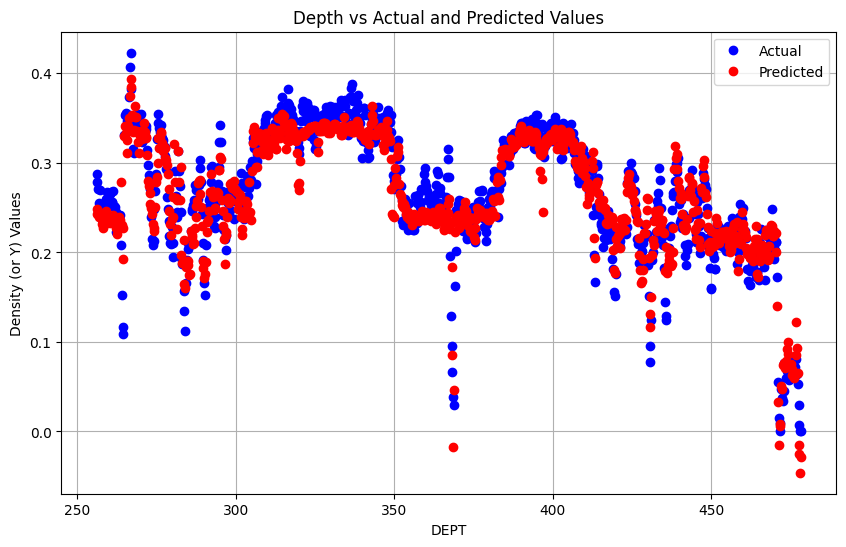

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values (Y_actual)
ax.plot(well['DEPT'], y, label='Actual', color='blue', marker='o', linestyle='')

# Plot predicted values (y_predicted)
ax.plot(well["DEPT"], predictions, label='Predicted', color='red', marker='o', linestyle='')

# Set axis labels and title
ax.set_xlabel('DEPT')
ax.set_ylabel('Density (or Y) Values')
ax.set_title('Depth vs Actual and Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

In [33]:
las1 = ls.read(r'C:\dataset\00-05-19-078-12W4-0 (1).LAS')
las1.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [34]:
for item in las1.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Well_name    - WELL (WELL): 		 HB THORNBURY LAKE
Location     - LOCATION (LOC): 		 00/05-19-078-12W4/0
Uwi          - UNIQUE WELL ID (UWI): 		 00/05-19-078-12W4/0
Entered      - ENTERED BY (ENTR): 		 JHS
Scn          - SERVICE COMPANY (SRVC): 		 SCHLUMBERGER
top_depth    - START DEPTH (STRT): 		 243.84
bot_depth    - STOP DEPTH (STOP): 		 456.84
increment    - STEP LENGTH (STEP): 		 0.25
NULL Value (NULL): 		 -999.25


In [35]:
for curve in las1.curves:
    print(curve.mnemonic)

DEPT
RHOB
GR
DPHI
NPHI
ILD


In [36]:
for count, curve in enumerate(las1.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: M, 	 Description: DEPTH        - DEPTH
Curve: RHOB, 	 Units: KG/M3, 	 Description: DENS         - BULK DENSITY
Curve: GR, 	 Units: API, 	 Description: GR           - GAMMA RAY
Curve: DPHI, 	 Units: V/V, 	 Description: PHID         - DENSITY POROSITY (SANDSTONE)
Curve: NPHI, 	 Units: V/V, 	 Description: PHIN         - NEUTRON POROSITY (SANDSTONE)
Curve: ILD, 	 Units: OHMM, 	 Description: RESD         - DEEP RESISTIVITY (DIL)
There are a total of: 6 curves present within this file


In [37]:
well1 = las1.df()

In [38]:
well1.head()

,RHOB,GR,DPHI,NPHI,ILD
DEPT,,,,,
243.84,0.0,96.990,0.273,0.553,3.000
244.09,0.0,95.131,0.263,0.535,3.062
244.34,0.0,94.819,0.254,0.529,3.064
244.59,0.0,97.583,0.264,0.550,3.012
244.84,0.0,95.688,0.259,0.558,2.913


In [39]:
well1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 243.84 to 456.84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    853 non-null    float64
 1   GR      853 non-null    float64
 2   DPHI    853 non-null    float64
 3   NPHI    853 non-null    float64
 4   ILD     853 non-null    float64
dtypes: float64(5)
memory usage: 40.0 KB


In [40]:
well1

,RHOB,GR,DPHI,NPHI,ILD
DEPT,,,,,
243.84,0.0,96.990,0.273,0.553,3.000
244.09,0.0,95.131,0.263,0.535,3.062
244.34,0.0,94.819,0.254,0.529,3.064
244.59,0.0,97.583,0.264,0.550,3.012
244.84,0.0,95.688,0.259,0.558,2.913
...,...,...,...,...,...
455.84,-0.0,16.213,0.061,0.167,163.274
456.09,0.0,17.373,0.054,0.166,147.966
456.34,0.0,18.799,0.044,0.179,121.243


In [41]:
well1 = well1[well1['DPHI'] >= 0]
well1

,RHOB,GR,DPHI,NPHI,ILD
DEPT,,,,,
243.84,0.0,96.990,0.273,0.553,3.000
244.09,0.0,95.131,0.263,0.535,3.062
244.34,0.0,94.819,0.254,0.529,3.064
244.59,0.0,97.583,0.264,0.550,3.012
244.84,0.0,95.688,0.259,0.558,2.913
...,...,...,...,...,...
455.84,-0.0,16.213,0.061,0.167,163.274
456.09,0.0,17.373,0.054,0.166,147.966
456.34,0.0,18.799,0.044,0.179,121.243


In [42]:
well1.reset_index(inplace=True)
well1

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,243.84,0.0,96.990,0.273,0.553,3.000
1,244.09,0.0,95.131,0.263,0.535,3.062
2,244.34,0.0,94.819,0.254,0.529,3.064
3,244.59,0.0,97.583,0.264,0.550,3.012
4,244.84,0.0,95.688,0.259,0.558,2.913
...,...,...,...,...,...,...
841,455.84,-0.0,16.213,0.061,0.167,163.274
842,456.09,0.0,17.373,0.054,0.166,147.966
843,456.34,0.0,18.799,0.044,0.179,121.243
844,456.59,-0.0,18.064,0.032,0.181,106.900


In [43]:
min_values1 = well1.min()
min_values1

DEPT    243.840
RHOB   -245.448
GR       15.518
DPHI     -0.000
NPHI      0.136
ILD       1.934
dtype: float64

In [44]:
max_values1 = well1.max()
max_values1

DEPT     456.840
RHOB    2575.210
GR       119.570
DPHI       0.356
NPHI       0.610
ILD      530.181
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\2721219865.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


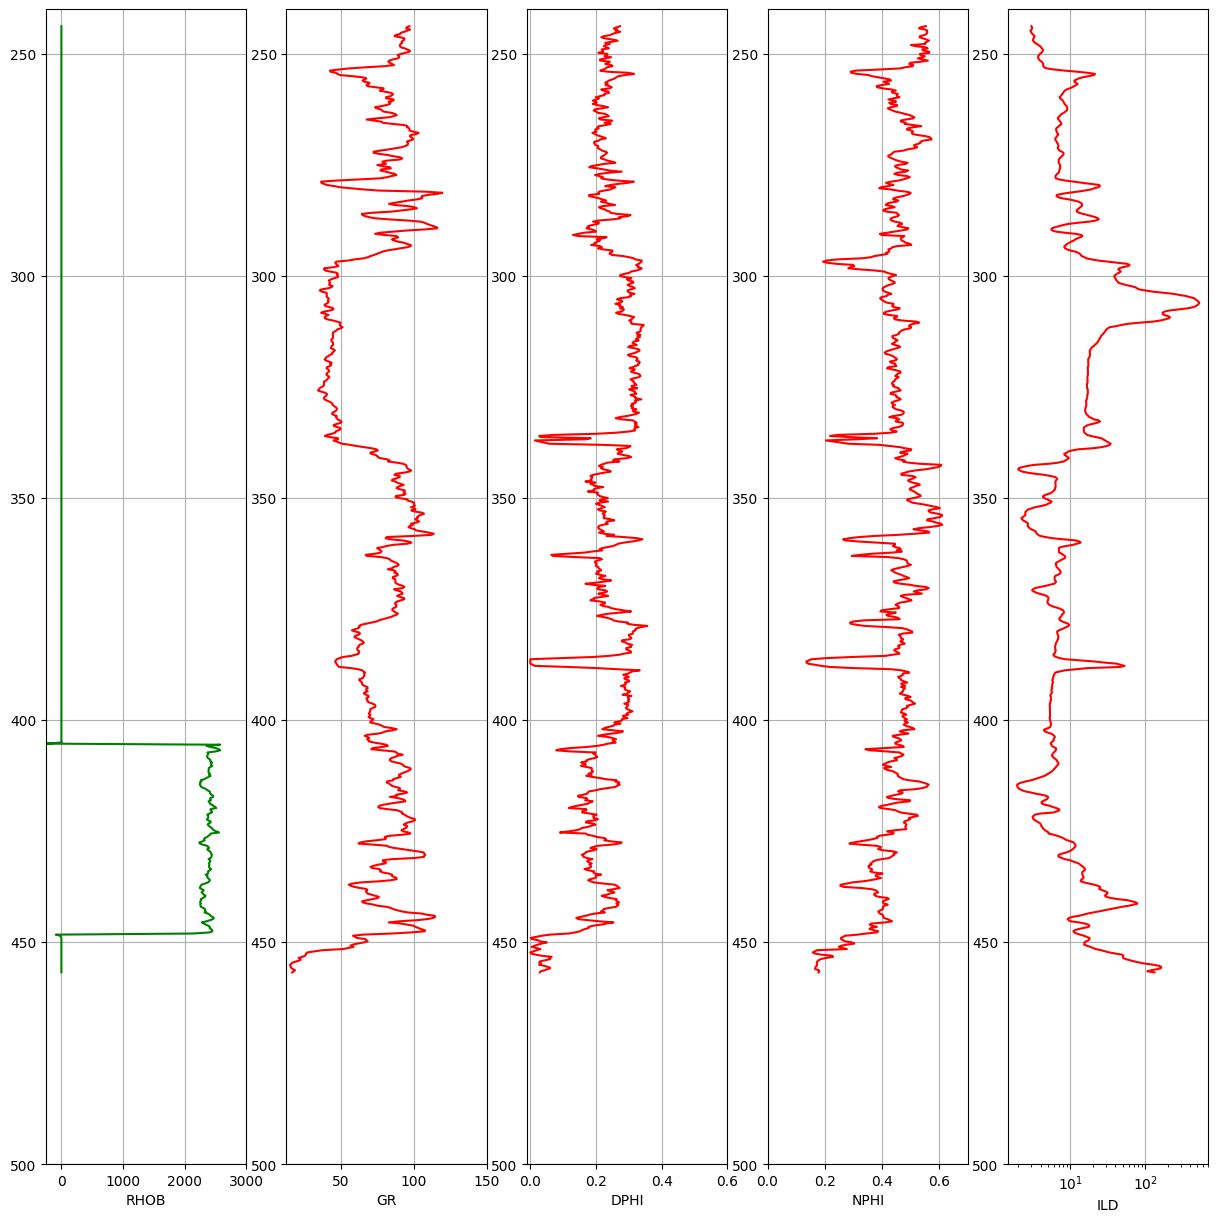

In [45]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = well1, color = "green")
ax1.set_xlim(-250, 3000) 

ax2.plot("GR", "DEPT", data = well1, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = well1, color = "red")
ax3.set_xlim(-0.01, 0.6)

ax4.plot("NPHI", "DEPT", data = well1, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = well1, color = "red")
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,240) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [46]:
X1 = well1[['GR', 'NPHI', 'ILD']].values
y1 = well1['DPHI'].values

In [47]:
X1 = scaler.fit_transform(X1)
model.fit(X1, y1, epochs=70, batch_size=32)

Epoch 1/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 2/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 3/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 4/70
27/27 [==============================] - 0s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 5/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020  
Epoch 6/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 7/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 8/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 9/70
27/27 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 10/70
27/27 [=======

In [48]:
predictions1 = model.predict(X1)
predictions1

27/27 [==============================] - 0s 4ms/step


array([[ 0.22782722],
       [ 0.22005355],
       [ 0.21636376],
       [ 0.22467974],
       [ 0.2310847 ],
       [ 0.23322845],
       [ 0.2369526 ],
       [ 0.23631018],
       [ 0.23685446],
       [ 0.23179194],
       [ 0.22532985],
       [ 0.22737521],
       [ 0.23234418],
       [ 0.23736653],
       [ 0.23546669],
       [ 0.23196056],
       [ 0.2335257 ],
       [ 0.20973423],
       [ 0.21659184],
       [ 0.23303893],
       [ 0.23238134],
       [ 0.22108334],
       [ 0.22057807],
       [ 0.2302762 ],
       [ 0.23491919],
       [ 0.22449633],
       [ 0.22882867],
       [ 0.23431605],
       [ 0.2306962 ],
       [ 0.22481883],
       [ 0.24260724],
       [ 0.2614926 ],
       [ 0.25646114],
       [ 0.23013231],
       [ 0.21963742],
       [ 0.21941215],
       [ 0.2504103 ],
       [ 0.2929389 ],
       [ 0.30328748],
       [ 0.25126466],
       [ 0.20489505],
       [ 0.16599348],
       [ 0.15827873],
       [ 0.19254333],
       [ 0.23754448],
       [ 0

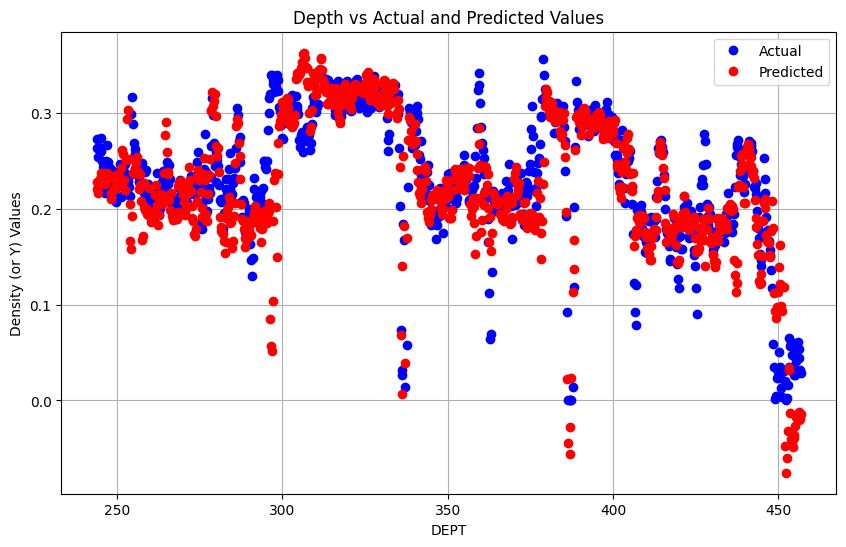

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values (Y_actual)
ax.plot(well1['DEPT'], y1, label='Actual', color='blue', marker='o', linestyle='')

# Plot predicted values (y_predicted)
ax.plot(well1["DEPT"], predictions1, label='Predicted', color='red', marker='o', linestyle='')

# Set axis labels and title
ax.set_xlabel('DEPT')
ax.set_ylabel('Density (or Y) Values')
ax.set_title('Depth vs Actual and Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

In [50]:
las2 = ls.read(r'C:\dataset\00-07-22-078-12W4-0.LAS')
las2.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [51]:
for item in las2.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Well_name    - WELL (WELL): 		 MESA HB THORNBURY
Location     - LOCATION (LOC): 		 00/07-22-078-12W4/0
Uwi          - UNIQUE WELL ID (UWI): 		 00/07-22-078-12W4/0
Entered      - ENTERED BY (ENTR): 		 JHS
Scn          - SERVICE COMPANY (SRVC): 		 SCHLUMBERGER
top_depth    - START DEPTH (STRT): 		 256.032
bot_depth    - STOP DEPTH (STOP): 		 475.282
increment    - STEP LENGTH (STEP): 		 0.25
NULL Value (NULL): 		 -999.25


In [52]:
for curve in las2.curves:
    print(curve.mnemonic)

DEPT
RHOB
GR
DPHI
NPHI
ILD


In [53]:
well2 = las2.df()

In [54]:
well2.head()

,RHOB,GR,DPHI,NPHI,ILD
DEPT,,,,,
256.032,0.0,0.000,0.217,0.487,3.304
256.282,0.0,105.485,0.234,0.487,3.374
256.532,0.0,101.879,0.231,0.500,3.390
256.782,0.0,101.656,0.237,0.507,3.441
257.032,0.0,104.711,0.227,0.508,3.555


In [55]:
well2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 256.032 to 475.282
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    878 non-null    float64
 1   GR      878 non-null    float64
 2   DPHI    878 non-null    float64
 3   NPHI    878 non-null    float64
 4   ILD     878 non-null    float64
dtypes: float64(5)
memory usage: 41.2 KB


In [56]:
well2 = well2[well2['DPHI'] >= 0]

In [57]:
well2.reset_index(inplace=True)
well2

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,256.032,0.0,0.000,0.217,0.487,3.304
1,256.282,0.0,105.485,0.234,0.487,3.374
2,256.532,0.0,101.879,0.231,0.500,3.390
3,256.782,0.0,101.656,0.237,0.507,3.441
4,257.032,0.0,104.711,0.227,0.508,3.555
...,...,...,...,...,...,...
872,474.032,0.0,28.896,0.006,0.170,48.435
873,474.282,0.0,28.633,0.000,0.172,49.223
874,474.782,-0.0,30.360,0.014,0.154,48.199
875,475.032,0.0,31.747,0.011,0.145,45.872


In [58]:
min_values2 = well2.min()
min_values2

DEPT    256.032
RHOB   -179.072
GR        0.000
DPHI      0.000
NPHI      0.134
ILD       2.031
dtype: float64

In [59]:
max_values2 = well2.max()
max_values2

DEPT     475.282
RHOB    2691.130
GR       136.235
DPHI       0.415
NPHI       0.607
ILD      343.241
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\601965164.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


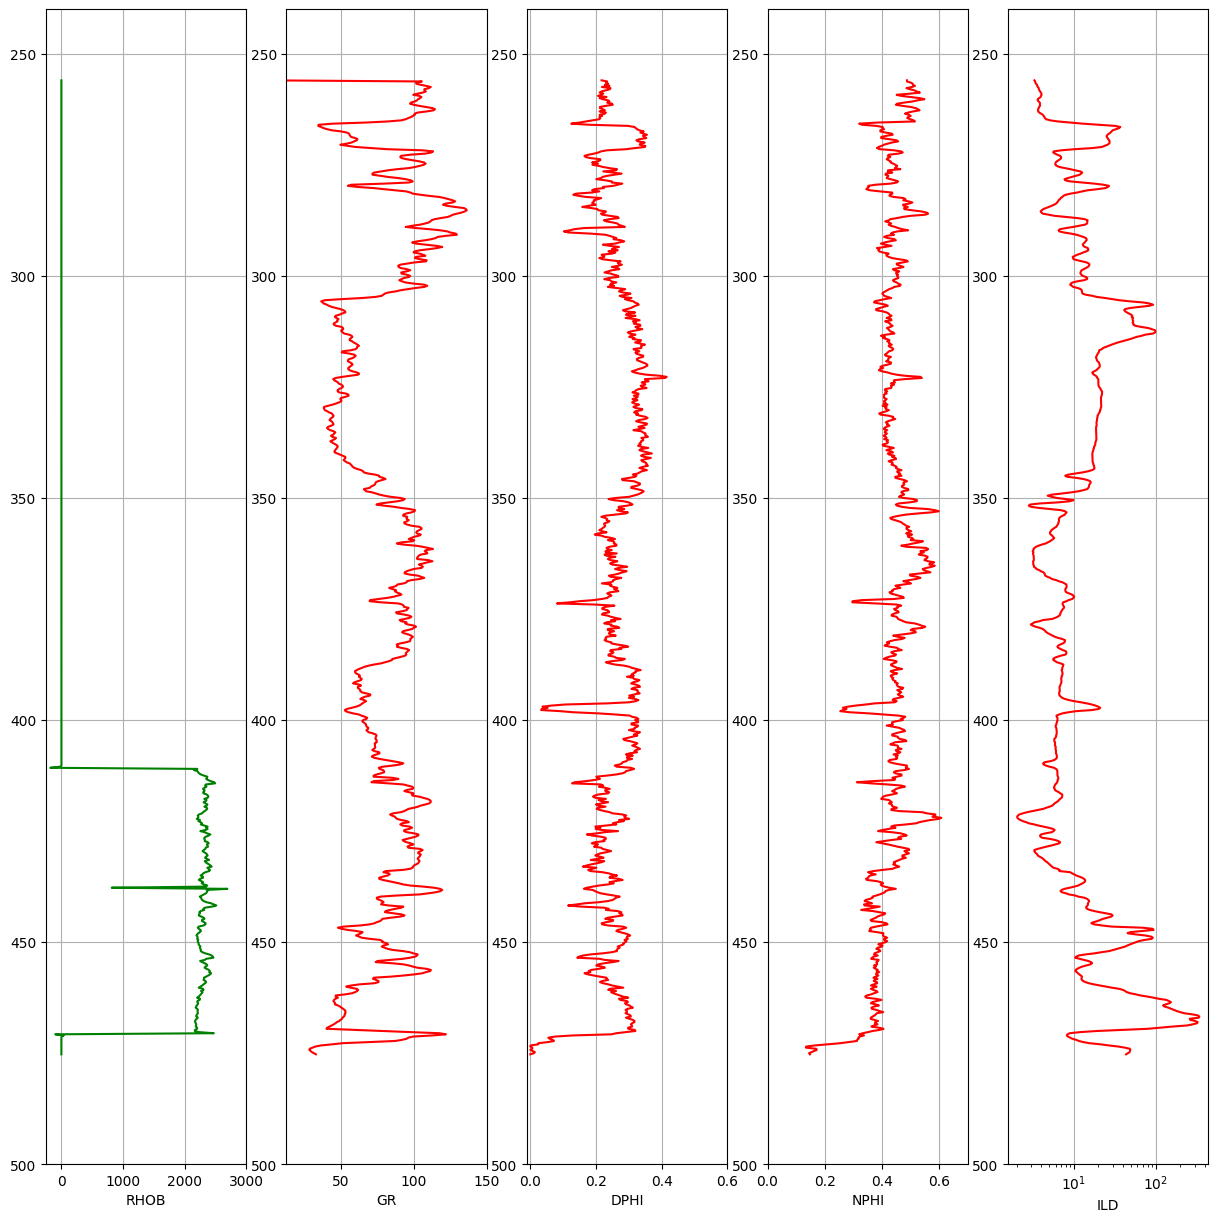

In [60]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = well2, color = "green")
ax1.set_xlim(-250, 3000) 

ax2.plot("GR", "DEPT", data = well2, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = well2, color = "red")
ax3.set_xlim(-0.01, 0.6)

ax4.plot("NPHI", "DEPT", data = well2, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = well2, color = "red")
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,240) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [61]:
X2 = well2[['GR', 'NPHI', 'ILD']].values
y2 = well2['DPHI'].values

In [62]:
X2 = scaler.fit_transform(X2)
model.fit(X2, y2, epochs=70, batch_size=32)

Epoch 1/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/70
28/28 [==============================] - 0s 2ms/step - loss: 9.6552e-04 - mean_squared_error: 9.6552e-04
Epoch 5/70
28/28 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 6/70
28/28 [==============================] - 0s 2ms/step - loss: 8.8670e-04 - mean_squared_error: 8.8670e-04
Epoch 7/70
28/28 [==============================] - 0s 2ms/step - loss: 9.5001e-04 - mean_squared_error: 9.5001e-04
Epoch 8/70
28/28 [==============================] - 0s 3ms/step - loss: 8.2752e-04 - mean_squared_error: 8.2752e-04
Epoch 9/70
28/28 [==============================] - 0s 2ms/step - loss: 7.8429e-04 - mean_squared_erro

In [63]:
predictions2 = model.predict(X2)
predictions2

28/28 [==============================] - 0s 894us/step


array([[ 0.23322718],
       [ 0.22549099],
       [ 0.23893113],
       [ 0.24352257],
       [ 0.23702256],
       [ 0.2331149 ],
       [ 0.22795756],
       [ 0.21386509],
       [ 0.22826457],
       [ 0.23416732],
       [ 0.23831445],
       [ 0.24723022],
       [ 0.2360001 ],
       [ 0.22525574],
       [ 0.22008435],
       [ 0.23164131],
       [ 0.24877791],
       [ 0.2592133 ],
       [ 0.24892046],
       [ 0.24525605],
       [ 0.23691708],
       [ 0.23338899],
       [ 0.22304258],
       [ 0.22270669],
       [ 0.22927089],
       [ 0.23354448],
       [ 0.23534696],
       [ 0.23535304],
       [ 0.23014536],
       [ 0.2306623 ],
       [ 0.23239587],
       [ 0.23740092],
       [ 0.24314533],
       [ 0.24197869],
       [ 0.24594186],
       [ 0.25073868],
       [ 0.25283653],
       [ 0.26503792],
       [ 0.22188918],
       [ 0.12409334],
       [ 0.1831706 ],
       [ 0.30178165],
       [ 0.32124877],
       [ 0.32314974],
       [ 0.33130637],
       [ 0

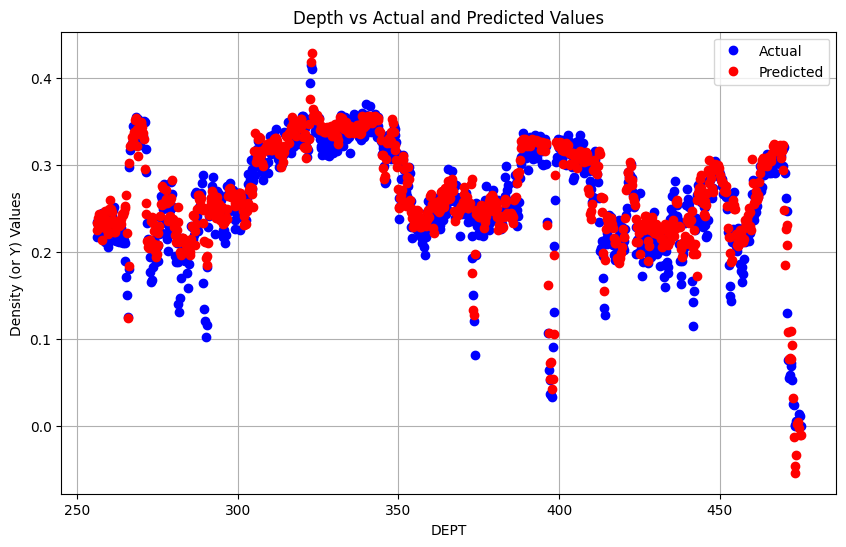

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values (Y_actual)
ax.plot(well2['DEPT'], y2, label='Actual', color='blue', marker='o', linestyle='')

# Plot predicted values (y_predicted)
ax.plot(well2["DEPT"], predictions2, label='Predicted', color='red', marker='o', linestyle='')

# Set axis labels and title
ax.set_xlabel('DEPT')
ax.set_ylabel('Density (or Y) Values')
ax.set_title('Depth vs Actual and Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

In [65]:
las3 = ls.read(r"C:\dataset\00-10-32-078-12W4-0.LAS")
las3.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [66]:
for item in las3.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Well_name    - WELL (WELL): 		 MESA HB THORNBURY
Location     - LOCATION (LOC): 		 00/10-32-078-12W4/0
Uwi          - UNIQUE WELL ID (UWI): 		 00/10-32-078-12W4/0
Entered      - ENTERED BY (ENTR): 		 JHS
Scn          - SERVICE COMPANY (SRVC): 		 SCHLUMBERGER
top_depth    - START DEPTH (STRT): 		 240
bot_depth    - STOP DEPTH (STOP): 		 455
increment    - STEP LENGTH (STEP): 		 0.25
NULL Value (NULL): 		 -999.25


In [67]:
for curve in las3.curves:
    print(curve.mnemonic)

DEPT
DPHI
NPHI
GR
ILD
RHOB


In [68]:
well3 = las3.df()

In [69]:
well3.head()

,DPHI,NPHI,GR,ILD,RHOB
DEPT,,,,,
240.00,0.283,0.600,104.469,3.182,0.0
240.25,0.267,0.590,103.875,3.244,0.0
240.50,0.257,0.580,103.886,3.308,0.0
240.75,0.267,0.573,106.331,3.371,0.0
241.00,0.273,0.577,105.132,3.502,0.0


In [70]:
well3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 240.0 to 455.0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPHI    861 non-null    float64
 1   NPHI    861 non-null    float64
 2   GR      861 non-null    float64
 3   ILD     861 non-null    float64
 4   RHOB    861 non-null    float64
dtypes: float64(5)
memory usage: 40.4 KB


In [71]:
well3.reset_index(inplace=True)
well3

,DEPT,DPHI,NPHI,GR,ILD,RHOB
0,240.00,0.283,0.600,104.469,3.182,0.0
1,240.25,0.267,0.590,103.875,3.244,0.0
2,240.50,0.257,0.580,103.886,3.308,0.0
3,240.75,0.267,0.573,106.331,3.371,0.0
4,241.00,0.273,0.577,105.132,3.502,0.0
...,...,...,...,...,...,...
856,454.00,0.083,0.205,16.925,71.694,0.0
857,454.25,0.084,0.209,16.942,70.408,0.0
858,454.50,0.109,0.203,16.950,64.167,0.0
859,454.75,0.102,0.194,16.964,58.483,0.0


In [72]:
min_values3= well3.min()
min_values3

DEPT    240.000
DPHI      0.031
NPHI      0.155
GR       14.874
ILD       1.762
RHOB      0.000
dtype: float64

In [73]:
max_values3= well3.max()
max_values3

DEPT     455.000
DPHI       0.604
NPHI       0.625
GR       128.034
ILD      105.808
RHOB    2523.190
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\4112179390.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


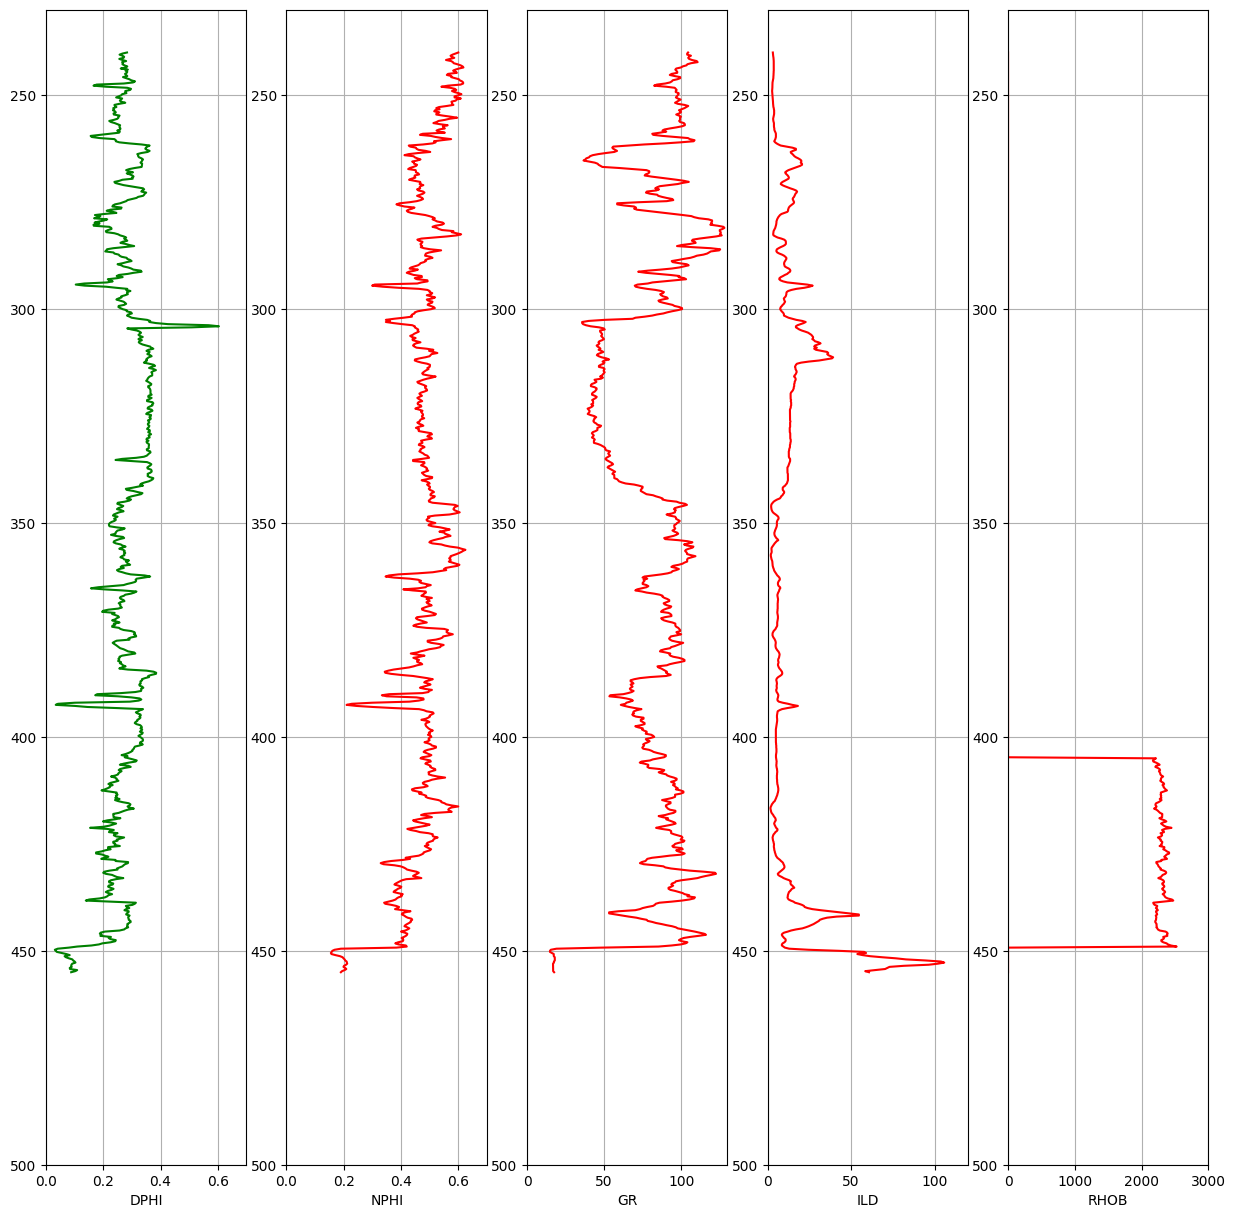

In [74]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['DPHI', 'NPHI', 'GR','ILD','RHOB']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("DPHI", "DEPT", data = well3, color = "green")
ax1.set_xlim(0,0.7) 

ax2.plot("NPHI", "DEPT", data = well3, color = "red")
ax2.set_xlim(0, 0.7)

ax3.plot("GR", "DEPT", data = well3, color = "red")
ax3.set_xlim(0, 130)

ax4.plot("ILD", "DEPT", data = well3, color = "red")
ax4.set_xlim(0, 120)

ax5.plot("RHOB", "DEPT", data = well3, color = "red")
ax5.set_xlim(0, 3000)





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,230) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [75]:
X3 = well3[['GR', 'NPHI', 'ILD']].values
y3 = well3['DPHI'].values
y3.shape

(861,)

In [76]:
X3 = scaler.fit_transform(X3)

In [77]:
predictions3 = model.predict(X3)
predictions3.shape

27/27 [==============================] - 0s 958us/step


(861, 1)

In [78]:
# Evaluate the model on the test data
mse_result = model.evaluate(X3, y3, verbose=0)

# The mse_result is a list containing the loss and metrics values
# The first element (index 0) is the loss, and the next elements are metrics values
# In this case, the second element (index 1) is the MSE
mse = mse_result[1]

# Print the MSE value
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.002837912878021598


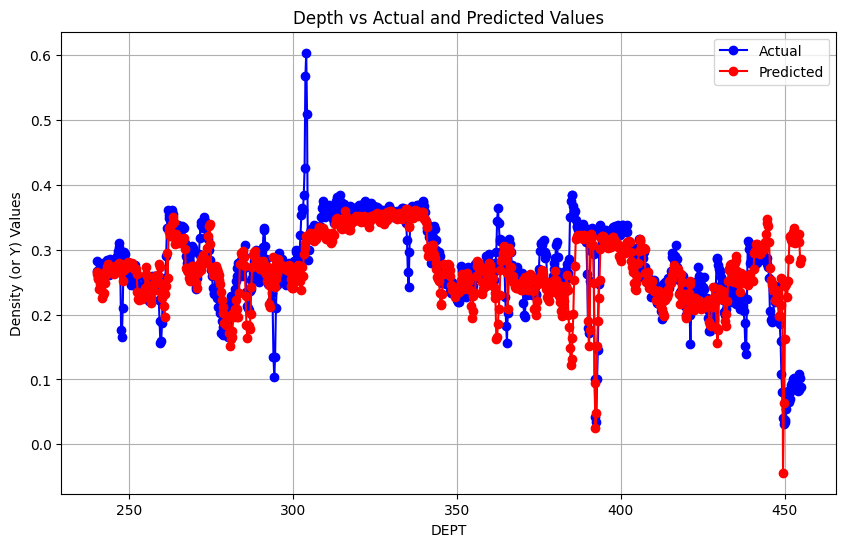

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values (Y_actual)
ax.plot(well3['DEPT'], y3, label='Actual', color='blue', marker='o', linestyle='-')

# Plot predicted values (y_predicted)
ax.plot(well3["DEPT"], predictions3, label='Predicted', color='red', marker='o', linestyle='-')

# Set axis labels and title
ax.set_xlabel('DEPT')
ax.set_ylabel('Density (or Y) Values')
ax.set_title('Depth vs Actual and Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

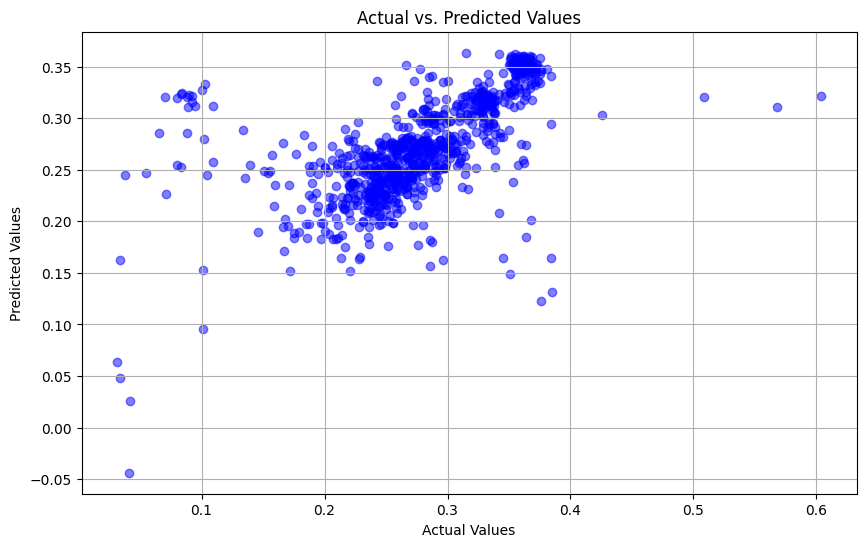

In [80]:



# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y3, predictions3, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
#plt.plot([min(y3), max(y3)], [min(predictions3), max(predictions3)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()


In [81]:
subset_well= well[well['RHOB'] > 0]
subset_well = subset_well.reset_index(drop=True)
subset_well

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,410.532,0.002,87.904,0.308,0.447,5.287
1,410.782,0.018,90.468,0.296,0.443,5.004
2,411.032,0.014,95.985,0.281,0.500,4.965
3,411.782,18.029,91.367,0.269,0.468,5.756
4,412.032,1344.890,87.081,0.280,0.448,5.997
...,...,...,...,...,...,...
236,470.032,2361.090,82.485,0.203,0.391,16.924
237,470.282,2362.060,72.041,0.212,0.386,17.658
238,470.532,2567.560,61.629,0.212,0.365,19.221
239,471.032,39.156,46.144,0.055,0.187,24.530


C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\1800453194.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


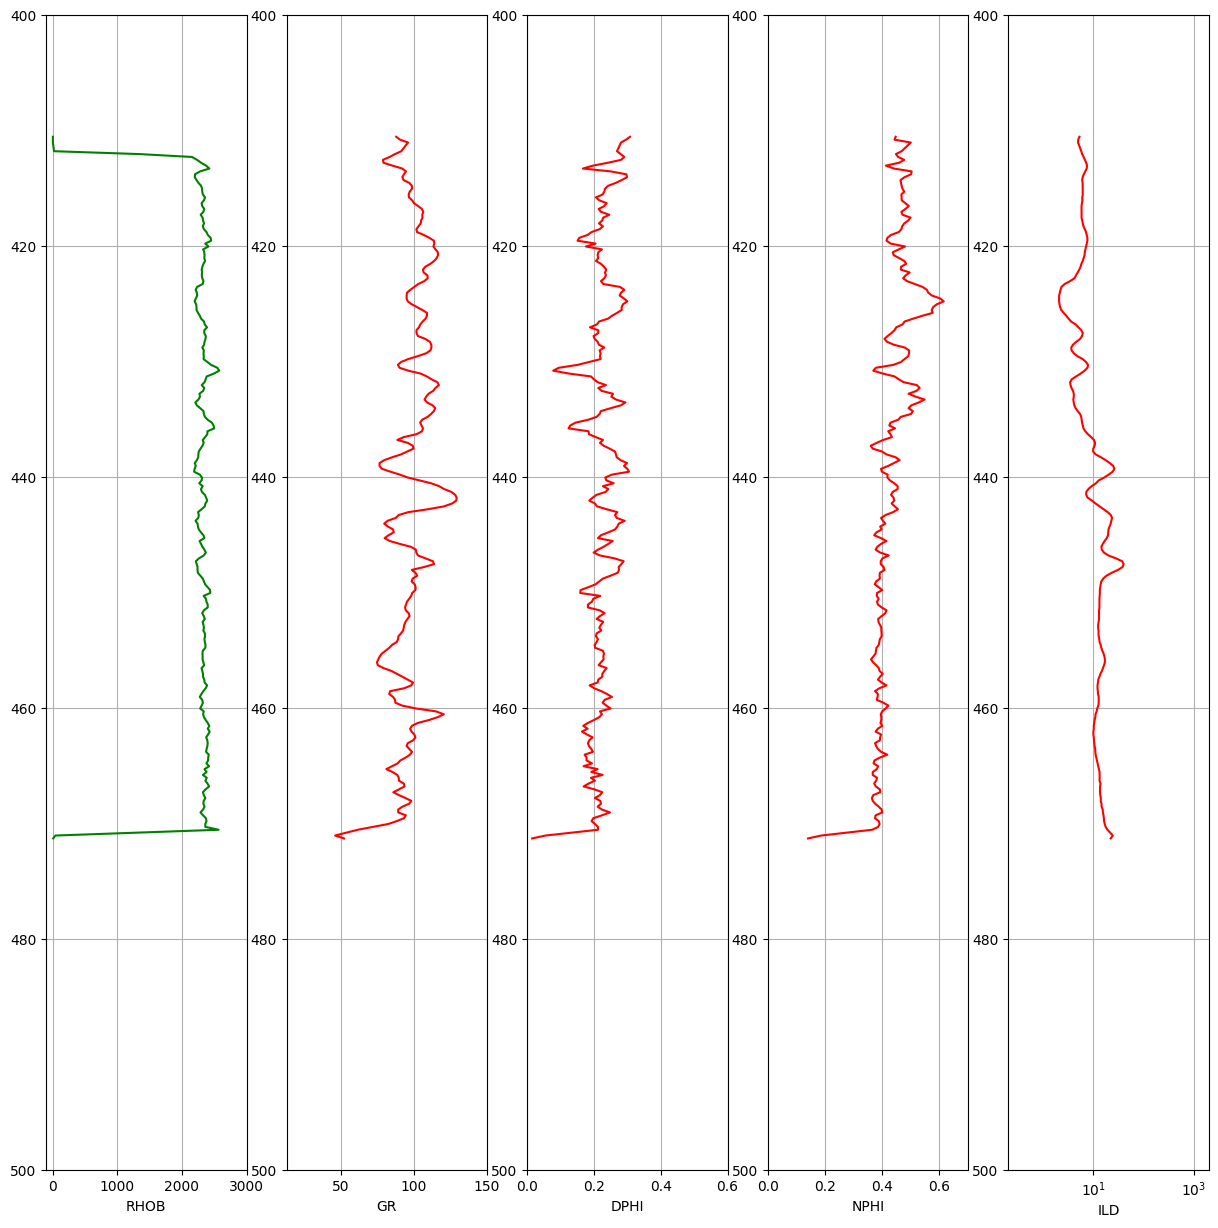

In [82]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = subset_well, color = "green")
ax1.set_xlim(-105, 3000) 

ax2.plot("GR", "DEPT", data = subset_well, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = subset_well, color = "red")
ax3.set_xlim(0, 0.6)

ax4.plot("NPHI", "DEPT", data = subset_well, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = subset_well, color = "red")
ax5.set_xlim(0.2, 2000)
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,400) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [83]:
X_subset = subset_well[['RHOB','GR', 'NPHI', 'ILD']].values
y_subset = subset_well['DPHI'].values

In [84]:
scaler = StandardScaler()
X_subset = scaler.fit_transform(X_subset)

# Build a simple neural network for regression
model1 = keras.Sequential([
    layers.Input(shape=(4,)),           
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)                    # 1 output neuron for Density
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

# Train the model on the first well log data
model1.fit(X_subset, y_subset, epochs=100, batch_size=10)


Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 2/100
25/25 [==============================] - 0s 957us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 7.6780e-04 - mean_squared_error: 7.6780e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 6.6231e-04 - mean_squared_error: 6.6231e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_squared_error: 

In [85]:
subset_well1= well1[well1['RHOB'] > 0]
subset_well1 = subset_well1.reset_index(drop=True)
subset_well1

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,404.59,0.307,69.213,0.250,0.467,5.984
1,404.84,3.828,69.244,0.253,0.458,5.739
2,405.09,4.419,72.636,0.260,0.447,5.533
3,405.59,2574.970,81.070,0.223,0.457,5.558
4,405.84,2354.830,82.220,0.205,0.472,5.652
...,...,...,...,...,...,...
171,447.59,2449.580,107.610,0.151,0.387,10.928
172,447.84,2406.460,98.066,0.136,0.381,11.199
173,448.09,2130.790,84.981,0.117,0.345,12.067
174,449.09,0.189,61.271,0.001,0.256,17.986


C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\2485015292.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


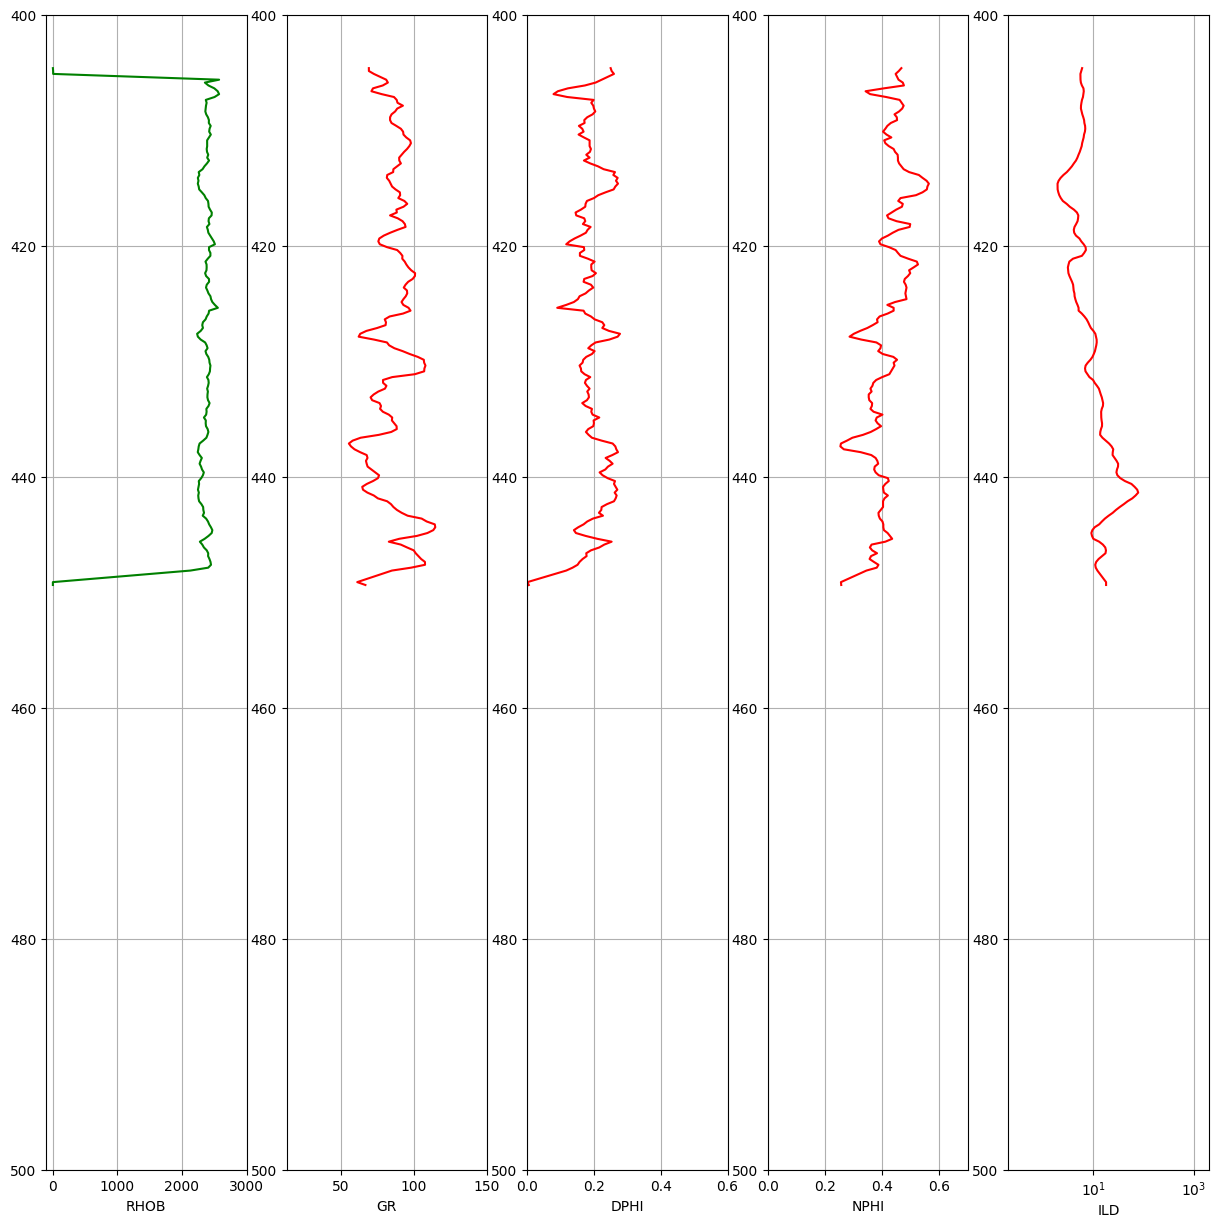

In [86]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = subset_well1, color = "green")
ax1.set_xlim(-105, 3000) 

ax2.plot("GR", "DEPT", data = subset_well1, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = subset_well1, color = "red")
ax3.set_xlim(0, 0.6)

ax4.plot("NPHI", "DEPT", data = subset_well1, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = subset_well1, color = "red")
ax5.set_xlim(0.2, 2000)
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,400) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [87]:
X_subset1 = subset_well1[['RHOB','GR', 'NPHI', 'ILD']].values
y_subset1 = subset_well1['DPHI'].values

In [88]:
X_subset1 = scaler.fit_transform(X_subset1)
model1.fit(X_subset1, y_subset1, epochs=100, batch_size=10)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 6.6126e-04 - mean_squared_error: 6.6126e-04
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 4.0124e-04 - mean_squared_error: 4.0124e-04
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 2.3482e-04 - mean_squared_error: 2.3482e-04
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 2.2787e-04 - mean_squared_error: 2.2787e-04
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0374e-04 - mean_squared_error: 2.0374e-04
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.8767e-04 - mean_squared_error: 1.8767e-04
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5879e-04 - mean_squared_error: 1.5879e-04
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss:

In [89]:
subset_well2= well2[well2['RHOB'] > 0]
subset_well2 = subset_well2.reset_index(drop=True)
subset_well2

,DEPT,RHOB,GR,DPHI,NPHI,ILD
0,409.782,0.017,92.829,0.279,0.442,4.217
1,410.032,0.286,90.593,0.272,0.463,4.281
2,410.282,0.856,85.737,0.257,0.487,4.561
3,411.032,2203.930,76.509,0.316,0.494,6.051
4,411.282,2147.840,78.900,0.305,0.479,6.259
...,...,...,...,...,...,...
239,470.032,2161.960,77.114,0.320,0.367,19.231
240,470.282,2226.100,97.813,0.291,0.351,12.015
241,470.532,2471.080,117.561,0.262,0.333,8.934
242,471.032,37.151,112.849,0.130,0.337,8.217


C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\2447308388.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


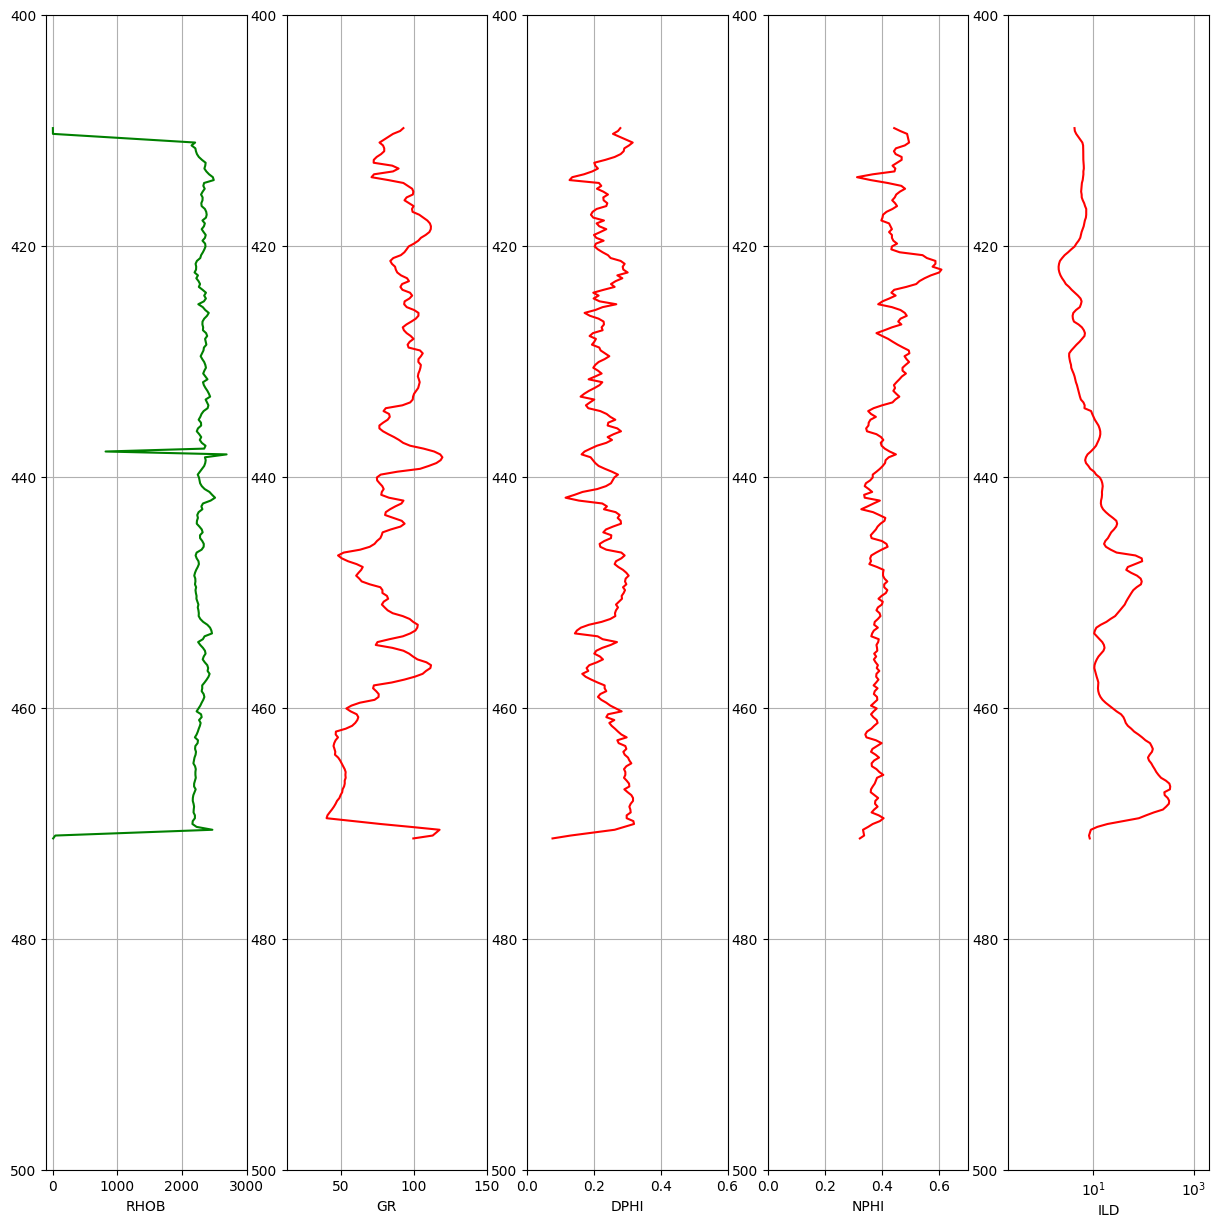

In [90]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = subset_well2, color = "green")
ax1.set_xlim(-105, 3000) 

ax2.plot("GR", "DEPT", data = subset_well2, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = subset_well2, color = "red")
ax3.set_xlim(0, 0.6)

ax4.plot("NPHI", "DEPT", data = subset_well2, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = subset_well2, color = "red")
ax5.set_xlim(0.2, 2000)
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(500,400) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [91]:
X_subset2 = subset_well2[['RHOB','GR', 'NPHI', 'ILD']].values
y_subset2 = subset_well2['DPHI'].values

In [92]:
X_subset2 = scaler.fit_transform(X_subset2)
model1.fit(X_subset2, y_subset2, epochs=100, batch_size=10)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7444e-04 - mean_squared_error: 7.7444e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 8.2354e-04 - mean_squared_error: 8.2354e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 3.8433e-04 - mean_squared_error: 3.8433e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 6.7977e-04 - mean_squared_error: 6.7977e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 6.1794e-04 - mean_squared_error: 6.1794e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.9191e-04 - mean_squared_error: 1.9191e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 2.0857e-04 - mean_squared_error: 2.0857e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [93]:
subset_well3= well3[well3['RHOB'] > 0]
subset_well3 = subset_well3.reset_index(drop=True)
subset_well3

,DEPT,DPHI,NPHI,GR,ILD,RHOB
0,405.00,0.290,0.468,85.219,5.164,2214.37
1,405.25,0.304,0.484,81.592,5.263,2189.40
2,405.50,0.317,0.502,79.781,5.365,2168.58
3,405.75,0.313,0.504,74.330,5.470,2174.89
4,406.00,0.290,0.489,73.129,5.372,2214.57
...,...,...,...,...,...,...
172,448.00,0.226,0.390,104.041,10.146,2322.80
173,448.25,0.197,0.380,102.844,9.076,2372.90
174,448.50,0.185,0.391,99.819,8.586,2393.80
175,448.75,0.159,0.417,93.759,8.591,2437.64


C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\2223162546.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)


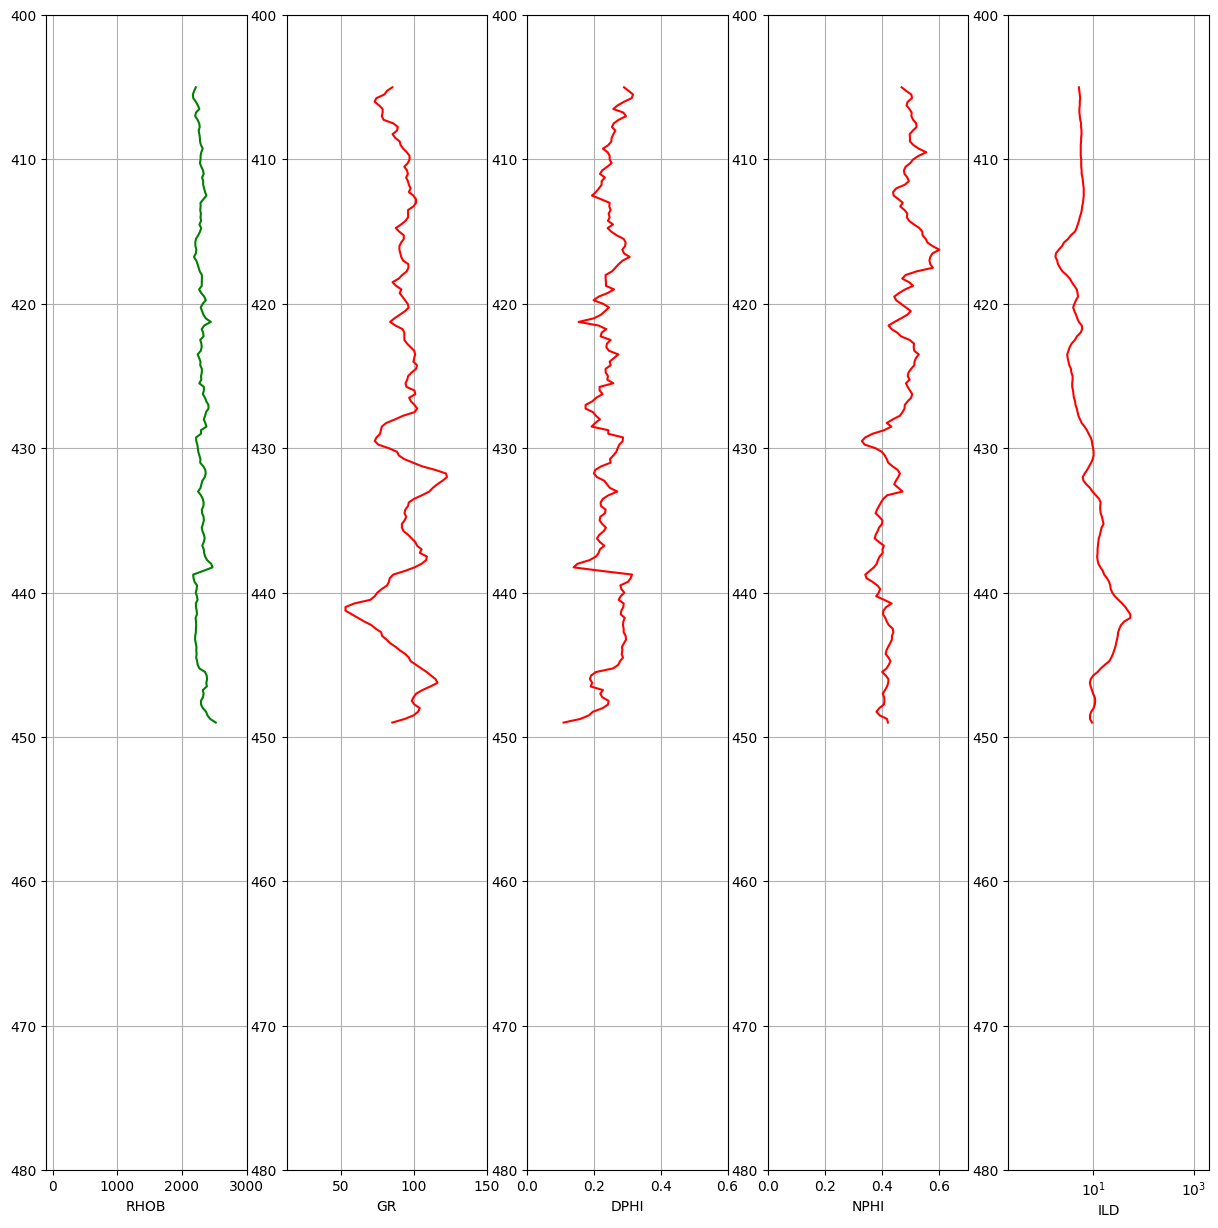

In [94]:
fig, axes = plt.subplots(figsize=(15,15))

curve_names = ['RHOB', 'GR', 'DPHI','NPHI','ILD']

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)

ax1.plot("RHOB", "DEPT", data = subset_well3, color = "green")
ax1.set_xlim(-105, 3000) 

ax2.plot("GR", "DEPT", data = subset_well3, color = "red")
ax2.set_xlim(13, 150)

ax3.plot("DPHI", "DEPT", data = subset_well3, color = "red")
ax3.set_xlim(0, 0.6)

ax4.plot("NPHI", "DEPT", data = subset_well3, color = "red")
ax4.set_xlim(0, 0.7)

ax5.plot("ILD", "DEPT", data = subset_well3, color = "red")
ax5.set_xlim(0.2, 2000)
ax5.semilogx()





for i, ax in enumerate(fig.axes):
    ax.set_ylim(480,400) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

In [95]:
X_subset3 = subset_well3[['RHOB','GR', 'NPHI', 'ILD']].values
y_subset3 = subset_well3['DPHI'].values

In [96]:
X_subset3 = scaler.fit_transform(X_subset3)

In [97]:
subset_predictions3 = model1.predict(X_subset3)
subset_predictions3

6/6 [==============================] - 0s 2ms/step


array([[ 0.29535544],
       [ 0.32348815],
       [ 0.34504172],
       [ 0.3461794 ],
       [ 0.30961013],
       [ 0.29767653],
       [ 0.28472716],
       [ 0.30735916],
       [ 0.3207377 ],
       [ 0.29228735],
       [ 0.31224492],
       [ 0.31165534],
       [ 0.31881255],
       [ 0.29168755],
       [ 0.29594213],
       [ 0.30235428],
       [ 0.28409195],
       [ 0.19174862],
       [ 0.25490966],
       [ 0.28196928],
       [ 0.27836367],
       [ 0.2928828 ],
       [ 0.26600805],
       [ 0.17190853],
       [ 0.1590921 ],
       [ 0.21366626],
       [ 0.1671914 ],
       [ 0.16442683],
       [ 0.10534251],
       [ 0.07517258],
       [ 0.07264842],
       [ 0.14171171],
       [ 0.27697206],
       [ 0.27450013],
       [ 0.28884295],
       [ 0.27905893],
       [ 0.28879687],
       [ 0.2802459 ],
       [ 0.31045535],
       [ 0.27127442],
       [ 0.31347358],
       [ 0.32381743],
       [ 0.31704503],
       [ 0.32165393],
       [ 0.34010735],
       [ 0

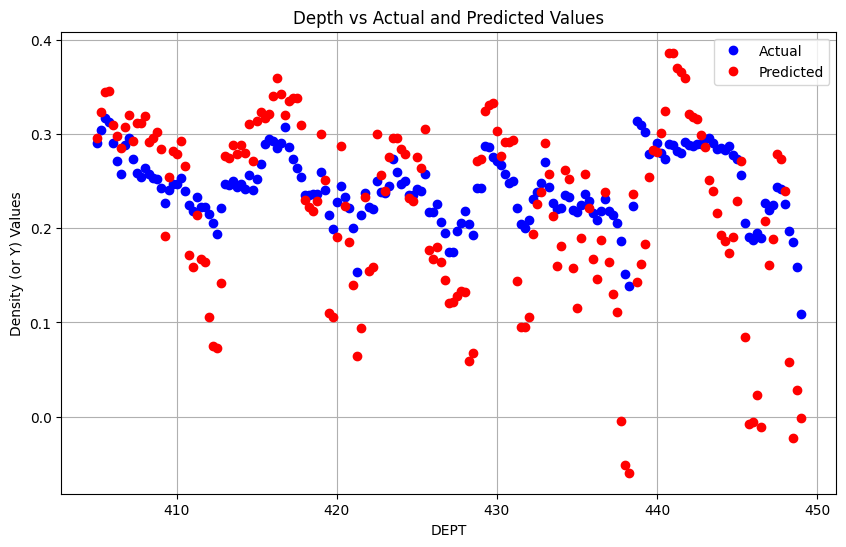

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values (Y_actual)
ax.plot(subset_well3['DEPT'], y_subset3, label='Actual', color='blue', marker='o', linestyle='')

# Plot predicted values (y_predicted)
ax.plot(subset_well3["DEPT"], subset_predictions3, label='Predicted', color='red', marker='o', linestyle='')

# Set axis labels and title
ax.set_xlabel('DEPT')
ax.set_ylabel('Density (or Y) Values')
ax.set_title('Depth vs Actual and Predicted Values')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

In [99]:
# Evaluate the model on the test data
mse_result = model1.evaluate(X_subset3, y_subset3, verbose=0)

# The mse_result is a list containing the loss and metrics values
# The first element (index 0) is the loss, and the next elements are metrics values
# In this case, the second element (index 1) is the MSE
mse = mse_result[1]

# Print the MSE value
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.0052161430940032005


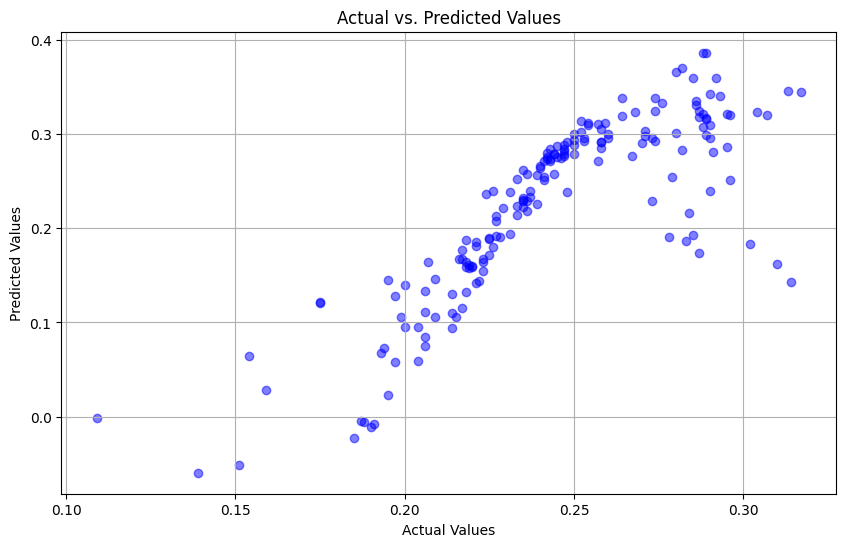

In [100]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_subset3, subset_predictions3, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
#plt.plot([min(y3), max(y3)], [min(predictions3), max(predictions3)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()
